Classification Model Analysis

In [12]:
# importing libraries
import pandas            as pd                       # data science essentials
import matplotlib.pyplot as plt                      # data visualization
import seaborn           as sns                      # enhanced data viz
import numpy as np
from sklearn.model_selection import train_test_split # train-test split
from sklearn.linear_model import LogisticRegression  # logistic regression
import statsmodels.formula.api as smf                # logistic regression
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.neighbors import KNeighborsRegressor    # KNN for regression
from sklearn.preprocessing import StandardScaler     # standard scaler
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import plot_tree                   # tree plots


# exporting data
gameofthrones = pd.read_excel('./GOT_character_predictions.xlsx')


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)


# displaying the head of the dataset
gameofthrones.head(n = 10)

,S.No,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
0,1,Viserys II Targaryen,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
1,2,Walder Frey,Lord of the Crossing,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
2,3,Addison Hill,Ser,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
3,4,Aemma Arryn,Queen,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
4,5,Sylva Santagar,Greenstone,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1
5,6,Tommen Baratheon,NaN,NaN,NaN,Cersei Lannister,Robert Baratheon,Myrcella Baratheon,NaN,NaN,0,0,0,0,0,1.0,1.0,1.0,NaN,0,0,NaN,5,1.000000,1
6,7,Valarr Targaryen,Hand of the King,Valyrian,183.0,NaN,NaN,NaN,House Targaryen,Kiera of Tyrosh,0,0,0,0,0,NaN,NaN,NaN,1.0,1,1,26.0,0,0.431438,0
7,8,Viserys I Targaryen,NaN,NaN,NaN,Alyssa Targaryen,Baelon Targaryen,Rhaenyra Targaryen,NaN,NaN,0,0,0,0,0,1.0,1.0,1.0,NaN,0,0,NaN,5,0.678930,0
8,9,Wilbert,Ser,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.006689,0
9,10,Wilbert Osgrey,Ser,NaN,NaN,NaN,NaN,NaN,House Osgrey,NaN,0,0,0,0,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.020067,1


In [184]:
# exploring the dataset
gameofthrones.describe(include='object')


,name
count,1946
unique,1946
top,Viserys II Targaryen
freq,1


In [185]:
# exploring the dataset
gameofthrones.describe(include='number')

,dateOfBirth,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,m_title,m_culture,m_dateOfBirth,m_mother,m_father,m_heir,m_house,m_spouse,m_isAliveMother,m_isAliveFather,m_isAliveHeir,m_isAliveSpouse,m_age
count,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000
mean,559.343782,0.198356,0.374615,0.480473,0.591984,0.395170,0.141829,0.460946,-266.835560,0.305755,0.089584,0.745632,0.517986,0.652107,0.777492,0.989209,0.986639,0.988181,0.219424,0.858171,0.989209,0.986639,0.988181,0.858171,0.777492
std,9236.930558,0.398864,0.484148,0.499747,0.491593,0.489013,0.348965,0.498601,9236.701483,1.383910,0.160568,0.435617,0.499805,0.476424,0.416037,0.103346,0.114843,0.108099,0.413963,0.348965,0.103346,0.114843,0.108099,0.348965,0.416037
min,-28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-298001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,268.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,0.000000,0.013378,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,268.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,27.000000,0.000000,0.033445,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,268.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,27.000000,0.000000,0.086957,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,298299.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
# exploring the dataset
gameofthrones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   S.No                        1946 non-null   int64  
 1   name                        1946 non-null   object 
 2   title                       938 non-null    object 
 3   culture                     677 non-null    object 
 4   dateOfBirth                 433 non-null    float64
 5   mother                      21 non-null     object 
 6   father                      26 non-null     object 
 7   heir                        23 non-null     object 
 8   house                       1519 non-null   object 
 9   spouse                      276 non-null    object 
 10  book1_A_Game_Of_Thrones     1946 non-null   int64  
 11  book2_A_Clash_Of_Kings      1946 non-null   int64  
 12  book3_A_Storm_Of_Swords     1946 non-null   int64  
 13  book4_A_Feast_For_Crows     1946 

In [14]:
# checking for missing values
gameofthrones.isnull().sum()

S.No                             0
name                             0
title                         1008
culture                       1269
dateOfBirth                   1513
mother                        1925
father                        1920
heir                          1923
house                          427
spouse                        1670
book1_A_Game_Of_Thrones          0
book2_A_Clash_Of_Kings           0
book3_A_Storm_Of_Swords          0
book4_A_Feast_For_Crows          0
book5_A_Dance_with_Dragons       0
isAliveMother                 1925
isAliveFather                 1920
isAliveHeir                   1923
isAliveSpouse                 1670
isMarried                        0
isNoble                          0
age                           1513
numDeadRelations                 0
popularity                       0
isAlive                          0
dtype: int64

In [16]:
# getting data dictionary
gameofthrones_description = pd.read_excel('./GOT_data_dictionary.xlsx')


# displaying the data dictionary
gameofthrones_description

,S.No,Character number (by order of appearance)
0,name,Character name
1,title,Honorary title(s) given to each character
2,male,"1 = male, 0 = female"
3,culture,Indicates the cultural group of a character
4,dateOfBirth,Known dates of birth for each character (measurement unknown)
5,mother,Character's biological mother
6,father,Character's biological father
7,heir,Character's biological heir
8,house,Indicates a character's allegiance to a house (i.e. a powerful family)
9,spouse,Character's spouse(s)


In [17]:
# user-defined functions

#########################
# mv_flagger
#########################
def mv_flagger(df):
    """
Flags all columns that have missing values with 'm-COLUMN_NAME'.

PARAMETERS
----------
df : DataFrame to flag missing values


RETURNS
-------
DataFrame with missing value flags."""


    for col in df:

        if df[col].isnull().astype(int).sum() > 0:
            df['m_'+col] = df[col].isnull().astype(int)
            
    return df



#########################
# text_split_feature
#########################
def text_split_feature(col, df, sep=' ', new_col_name='number_of_names'):
    """
Splits values in a string Series (as part of a DataFrame) and sums the number
of resulting items. Automatically appends summed column to original DataFrame.

PARAMETERS
----------
col          : column to split
df           : DataFrame where column is located
sep          : string sequence to split by, default ' '
new_col_name : name of new column after summing split, default
               'number_of_names'
"""
    
    df[new_col_name] = 0
    
    
    for index, val in df.iterrows():
        df.loc[index, new_col_name] = len(df.loc[index, col].split(sep = ' '))

In [21]:
# running the mv_flagger function
gameofthrones = mv_flagger(df = gameofthrones)


In [23]:
# displaying columns
gameofthrones.columns


Index(['S.No', 'name', 'title', 'culture', 'dateOfBirth', 'mother', 'father', 'heir', 'house', 'spouse', 'book1_A_Game_Of_Thrones', 'book2_A_Clash_Of_Kings', 'book3_A_Storm_Of_Swords', 'book4_A_Feast_For_Crows', 'book5_A_Dance_with_Dragons', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'isMarried', 'isNoble', 'age', 'numDeadRelations', 'popularity', 'isAlive', 'm_title', 'm_culture', 'm_dateOfBirth', 'm_mother', 'm_father', 'm_heir', 'm_house', 'm_spouse', 'm_isAliveMother', 'm_isAliveFather', 'm_isAliveHeir', 'm_isAliveSpouse', 'm_age'], dtype='object')

In [25]:
# imputing missing values for categorical
gameofthrones['title'] = gameofthrones['title'].fillna('Unknown')
gameofthrones['mother'] = gameofthrones['mother'].fillna('Unknown')
gameofthrones['culture'] = gameofthrones['culture'].fillna('Unknown')
gameofthrones['heir'] = gameofthrones['heir'].fillna('Unknown')
gameofthrones['father'] = gameofthrones['father'].fillna('Unknown')
gameofthrones['spouse'] = gameofthrones['spouse'].fillna('Unknown')
gameofthrones['house'] = gameofthrones['house'].fillna('Unknown')

# imputing missing values for discrete
gameofthrones['age'] = gameofthrones['age'].fillna(gameofthrones['age'].median())
gameofthrones['dateOfBirth'] = gameofthrones['dateOfBirth'].fillna(gameofthrones['dateOfBirth'].median())

# imputing for dummies
gameofthrones['isAliveSpouse'] = gameofthrones['isAliveSpouse'].fillna(0)
gameofthrones['isAliveMother'] = gameofthrones['isAliveMother'].fillna(0)
gameofthrones['isAliveFather'] = gameofthrones['isAliveFather'].fillna(0)
gameofthrones['isAliveHeir'] = gameofthrones['isAliveHeir'].fillna(0)

# checking results
gameofthrones.isnull().sum(axis = 0)

S.No                          0
name                          0
title                         0
culture                       0
dateOfBirth                   0
mother                        0
father                        0
heir                          0
house                         0
spouse                        0
book1_A_Game_Of_Thrones       0
book2_A_Clash_Of_Kings        0
book3_A_Storm_Of_Swords       0
book4_A_Feast_For_Crows       0
book5_A_Dance_with_Dragons    0
isAliveMother                 0
isAliveFather                 0
isAliveHeir                   0
isAliveSpouse                 0
isMarried                     0
isNoble                       0
age                           0
numDeadRelations              0
popularity                    0
isAlive                       0
m_title                       0
m_culture                     0
m_dateOfBirth                 0
m_mother                      0
m_father                      0
m_heir                        0
m_house 

In [27]:
# dropping categorical variables after they've been encoded
gameofthrones = gameofthrones.drop(['S.No', 'mother', 'father', 'heir', 'isAliveMother', 'isAliveSpouse', 'isAliveFather',
               'isAliveHeir', 'spouse', 'title', 'culture', 'house'], axis = 1)

gameofthrones.columns

Index(['name', 'dateOfBirth', 'book1_A_Game_Of_Thrones', 'book2_A_Clash_Of_Kings', 'book3_A_Storm_Of_Swords', 'book4_A_Feast_For_Crows', 'book5_A_Dance_with_Dragons', 'isMarried', 'isNoble', 'age', 'numDeadRelations', 'popularity', 'isAlive', 'm_title', 'm_culture', 'm_dateOfBirth', 'm_mother', 'm_father', 'm_heir', 'm_house', 'm_spouse', 'm_isAliveMother', 'm_isAliveFather', 'm_isAliveHeir', 'm_isAliveSpouse', 'm_age'], dtype='object')

In [51]:
# correlation matrix
df_corr = gameofthrones.corr(method='pearson').round(2)
df_corr['isAlive'].sort_values()
# df_corr


numDeadRelations             -0.19
popularity                   -0.18
book1_A_Game_Of_Thrones      -0.15
book2_A_Clash_Of_Kings       -0.07
dateOfBirth                  -0.05
isMarried                    -0.05
isNoble                      -0.04
book3_A_Storm_Of_Swords       0.01
book5_A_Dance_with_Dragons    0.03
m_house                       0.04
m_culture                     0.04
m_title                       0.04
m_isAliveSpouse               0.05
age                           0.05
m_spouse                      0.05
m_heir                        0.13
m_isAliveHeir                 0.13
m_mother                      0.14
m_father                      0.14
m_isAliveMother               0.14
m_isAliveFather               0.14
m_dateOfBirth                 0.15
m_age                         0.15
book4_A_Feast_For_Crows       0.27
isAlive                       1.00
Name: isAlive, dtype: float64

In [129]:
# defining the function optimal_neighbors
def optimal_neighbors(x_data,
                      y_data,
                      standardize = True,
                      pct_test=0.25,
                      seed=219,
                      response_type='reg',
                      max_neighbors=20,
                      show_viz=True):
    """
Exhaustively compute training and testing results for KNN across
[1, max_neighbors]. Outputs the maximum test score and (by default) a
visualization of the results.
PARAMETERS
----------
x_data        : explanatory variable data
y_data        : response variable
standardize   : whether or not to standardize the x data, default True
pct_test      : test size for training and validation from (0,1), default 0.25
seed          : random seed to be used in algorithm, default 219
response_type : type of neighbors algorithm to use, default 'reg'
    Use 'reg' for regression (KNeighborsRegressor)
    Use 'class' for classification (KNeighborsClassifier)
max_neighbors : maximum number of neighbors in exhaustive search, default 20
show_viz      : display or surpress k-neigbors visualization, default True
"""    
    
    
    if standardize == True:
        # optionally standardizing x_data
        scaler             = StandardScaler()
        scaler.fit(x_data)
        x_scaled           = scaler.transform(x_data)
        x_scaled_df        = pd.DataFrame(x_scaled)
        x_data             = x_scaled_df



    # train-test split
    x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                        y_data,
                                                        test_size = pct_test,
                                                        random_state = seed)


    # creating lists for training set accuracy and test set accuracy
    training_accuracy = []
    test_accuracy = []
    
    
    # setting neighbor range
    neighbors_settings = range(1, max_neighbors + 1)


    for n_neighbors in neighbors_settings:
        # building the model based on response variable type
        if response_type == 'reg':
            clf = KNeighborsRegressor(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)
            
        elif response_type == 'class':
            clf = KNeighborsClassifier(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)            
            
        else:
            print("Error: response_type must be 'reg' or 'class'")
        
        
        # recording the training set accuracy
        training_accuracy.append(clf.score(x_train, y_train))
    
        # recording the generalization accuracy
        test_accuracy.append(clf.score(x_test, y_test))


    # optionally displaying visualization
    if show_viz == True:
        # plotting the visualization
        fig, ax = plt.subplots(figsize=(12,8))
        plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
        plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("n_neighbors")
        plt.legend()
        plt.show()
    
    
    # returning optimal number of neighbors
    print(f"The optimal number of neighbors is: {test_accuracy.index(max(test_accuracy))+1}")
    return test_accuracy.index(max(test_accuracy))+1


########################################
# defining the function visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

In [131]:
# declaring explanatory variables
gameofthrones_data = gameofthrones.drop(['isAlive', 'name'], axis = 1)


# declaring response variable
gameofthrones_target = gameofthrones.loc[ : , 'isAlive']


In [132]:
# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            gameofthrones_data,
            gameofthrones_target,
            test_size    = 0.10,
            random_state = 219,
            stratify     = gameofthrones_target) 


# merging training data for statsmodels
gameofthrones_train = pd.concat([x_train, y_train], axis = 1)

After running several logistic regression models, it was decided to use the following features:
m_age, popularity, book4_A_Feast_For_Crows, m_isAliveMother, book1_A_Game_Of_Thrones to make the final models.

In [146]:
#####################
# Sample Solution 1 #
#####################

# instantiating a logistic regression model object
logit_sig = smf.logit(formula = """ isAlive ~
                                    m_age +
                                    popularity +
                                    book4_A_Feast_For_Crows +
                                    m_isAliveMother +
                                    book1_A_Game_Of_Thrones
                                    """,
                                  data = gameofthrones_train)

# numDeadRelations             -0.19
# popularity                   -0.18
# book1_A_Game_Of_Thrones      -0.15
# m_isAliveSpouse               0.05
# age                           0.05
# m_spouse                      0.05
# m_heir                        0.13
# m_isAliveHeir                 0.13
# m_mother                      0.14
# m_father                      0.14
# m_isAliveMother               0.14
# m_isAliveFather               0.14
# m_dateOfBirth                 0.15
# m_age                         0.15
# book4_A_Feast_For_Crows       0.27

# fitting the model object
logit_sig = logit_sig.fit()


# checking the results SUMMARY
logit_sig.summary2()

Optimization terminated successfully.
         Current function value: 0.497917
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
=======================================================================
Model:                Logit              Pseudo R-squared:   0.122     
Dependent Variable:   isAlive            AIC:                1755.7040 
Date:                 2021-12-07 19:19   BIC:                1788.5116 
No. Observations:     1751               Log-Likelihood:     -871.85   
Df Model:             5                  LL-Null:            -992.53   
Df Residuals:         1745               LLR p-value:        3.9145e-50
Converged:            1.0000             Scale:              1.0000    
No. Iterations:       6.0000                                           
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
Intercept               -1.7636   0.7309 -2.4131 0.0158 -3.1961 -0.3312
m_age                    0.9025   0.1497  6.0290 0.0000  0.6091  1.1958
popularity              -1.2171   0.4177 -2.9137 0.0036 -2.0358 -0.3984
book4_A_Feast_For_Crows  1.4976   0.1288 11.6279 0.0000  1.2452  1.7501
m_isAliveMother          1.6826   0.6969  2.4144 0.0158  0.3167  3.0485
book1_A_Game_Of_Thrones -0.6868   0.1499 -4.5814 0.0000 -0.9807 -0.3930
=======================================================================

"""

In [147]:
# train/test split with the full model
gameofthrones_data   =  gameofthrones.loc[ : , ['m_age', 'popularity', 'book4_A_Feast_For_Crows', 'm_isAliveMother', 'book1_A_Game_Of_Thrones']]
gameofthrones_target =  gameofthrones.loc[ : , 'isAlive']


# this is the exact code we were using before
x_train, x_test, y_train, y_test = train_test_split(
            gameofthrones_data,
            gameofthrones_target,
            random_state = 219,
            test_size    = 0.10,
            stratify     = gameofthrones_target)


# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = 219)


# FITTING the training data
logreg_fit = logreg.fit(x_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(x_test)


# SCORING the results
print('LogReg Training ACCURACY:', logreg_fit.score(x_train, y_train).round(4))
print('LogReg Testing  ACCURACY:', logreg_fit.score(x_test, y_test).round(4))

# saving scoring data for future use
logreg_train_score = logreg_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = logreg_fit.score(x_test, y_test).round(4)   # accuracy


# displaying and saving the gap between training and testing
print('LogReg Train-Test Gap   :', abs(logreg_train_score - logreg_test_score).round(4))
logreg_test_gap = abs(logreg_train_score - logreg_test_score).round(4)

LogReg Training ACCURACY: 0.7801
LogReg Testing  ACCURACY: 0.8308
LogReg Train-Test Gap   : 0.0507


In [148]:
# creating a confusion matrix
print(confusion_matrix(y_true = y_test,
                       y_pred = logreg_pred))

[[ 19  31]
 [  2 143]]


In [149]:
# unpacking the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {logreg_tn}
False Positives: {logreg_fp}
False Negatives: {logreg_fn}
True Positives : {logreg_tp}
""")


True Negatives : 19
False Positives: 31
False Negatives: 2
True Positives : 143



In [150]:
# area under the roc curve (auc)
print(roc_auc_score(y_true  = y_test,
                    y_score = logreg_pred).round(decimals = 4))


# saving AUC score for future use
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = logreg_pred).round(decimals = 4)

0.6831


In [151]:
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = x_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

In [152]:
# INSTANTIATING a classification tree object
full_tree = DecisionTreeClassifier()


# FITTING the training data
full_tree_fit = full_tree.fit(x_train, y_train)


# PREDICTING on new data
full_tree_pred = full_tree_fit.predict(x_test)


# SCORING the model
print('Full Tree Training ACCURACY:', full_tree_fit.score(x_train,
                                                     y_train).round(4))

print('Full Tree Testing ACCURACY :', full_tree_fit.score(x_test,
                                                     y_test).round(4))

print('Full Tree AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = full_tree_pred).round(4))


# saving scoring data for future use
full_tree_train_score = full_tree_fit.score(x_train, y_train).round(4) # accuracy
full_tree_test_score  = full_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC
full_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = full_tree_pred).round(4) # auc

Full Tree Training ACCURACY: 0.8567
Full Tree Testing ACCURACY : 0.8154
Full Tree AUC Score: 0.7383


In [153]:
# unpacking the confusion matrix
full_tree_tn, \
full_tree_fp, \
full_tree_fn, \
full_tree_tp = confusion_matrix(y_true = y_test, y_pred = full_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {full_tree_tn}
False Positives: {full_tree_fp}
False Negatives: {full_tree_fn}
True Positives : {full_tree_tp}
""")


True Negatives : 29
False Positives: 21
False Negatives: 15
True Positives : 130



In [154]:
# new packages
from sklearn.model_selection import RandomizedSearchCV     # hyperparameter tuning
from sklearn.metrics import make_scorer              # customizable scorer

In [155]:
########################################
# RandomizedSearchCV
########################################

# declaring a hyperparameter space
C_range          = np.arange(0.1, 5.0, 0.1)
warm_start_range = [True, False]
solver_range     = ['newton-cg', 'sag', 'lbfgs']


# creating a hyperparameter grid
param_grid = {'C'          : C_range,
              'warm_start' : warm_start_range,
              'solver'     : solver_range}


# INSTANTIATING the model object without hyperparameters
lr_tuned = LogisticRegression(random_state = 219,
                              max_iter     = 1000) # increased for convergence


# GridSearchCV object
lr_tuned_cv = RandomizedSearchCV(estimator           = lr_tuned,   # the model object
                                 param_distributions = param_grid, # parameters to tune
                                 cv                  = 3,          # how many folds in cross-validation
                                 n_iter              = 250,        # number of combinations of hyperparameters to try
                                 random_state        = 219,        # starting point for random sequence
                                 scoring = make_scorer(
                                           roc_auc_score,
                                           needs_threshold = False)) # scoring criteria (AUC)


# FITTING to the FULL DATASET (due to cross-validation)
lr_tuned_cv.fit(gameofthrones_data, gameofthrones_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", lr_tuned_cv.best_params_)
print("Tuned CV AUC      :", lr_tuned_cv.best_score_.round(4))

Tuned Parameters  : {'warm_start': False, 'solver': 'lbfgs', 'C': 2.4000000000000004}
Tuned CV AUC      : 0.6331


In [156]:
# checking the best estimator for the model
lr_tuned_cv.best_estimator_

LogisticRegression(C=2.4000000000000004, max_iter=1000, random_state=219)

In [157]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
lr_tuned = LogisticRegression(C            = 3.9000000000000004,
                              warm_start   = True,
                              solver       = 'newton-cg',
                              max_iter     = 1000,
                              random_state = 219)


# FITTING the model to the full dataset
lr_tuned.fit(gameofthrones_data, gameofthrones_target) # this is ok because already tuned


# PREDICTING based on the testing set
lr_tuned_pred = lr_tuned.predict(x_test)


# SCORING the results
print('LR Tuned Training ACCURACY:', lr_tuned.score(x_train, y_train).round(4))
print('LR Tuned Testing  ACCURACY:', lr_tuned.score(x_test, y_test).round(4))
print('LR Tuned AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = lr_tuned_pred).round(4))


# saving scoring data for future use
lr_tuned_train_score = lr_tuned.score(x_train, y_train).round(4) # accuracy
lr_tuned_test_score  = lr_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
lr_tuned_auc         = roc_auc_score(y_true  = y_test,
                                     y_score = lr_tuned_pred).round(4) # auc

LR Tuned Training ACCURACY: 0.787
LR Tuned Testing  ACCURACY: 0.8564
LR Tuned AUC Score        : 0.7397


In [158]:
# unpacking the confusion matrix
lr_tuned_tn, \
lr_tuned_fp, \
lr_tuned_fn, \
lr_tuned_tp = confusion_matrix(y_true = y_test, y_pred = lr_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {lr_tuned_tn}
False Positives: {lr_tuned_fp}
False Negatives: {lr_tuned_fn}
True Positives : {lr_tuned_tp}
""")


True Negatives : 25
False Positives: 25
False Negatives: 3
True Positives : 142



In [159]:
# declaring a hyperparameter space
criterion_range = ['gini', 'entropy']
splitter_range  = ['best', 'random']
depth_range     = np.arange(1, 8, 1)
leaf_range      = np.arange(1, 100, 1)

# creating a hyperparameter grid
param_grid = {'criterion'        : criterion_range,
              'splitter'         : splitter_range,
              'max_depth'        : depth_range,
              'min_samples_leaf' : leaf_range}


# INSTANTIATING the model object without hyperparameters
tuned_tree = DecisionTreeClassifier(random_state = 219)


# RandomizedSearchCV object
tuned_tree_cv = RandomizedSearchCV(estimator             = tuned_tree,
                                   param_distributions   = param_grid,
                                   cv                    = 3,
                                   n_iter                = 1000,
                                   random_state          = 219,
                                   scoring = make_scorer(roc_auc_score,
                                             needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
tuned_tree_cv.fit(gameofthrones_data, gameofthrones_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", tuned_tree_cv.best_params_)
print("Tuned Training AUC:", tuned_tree_cv.best_score_.round(4))

Tuned Parameters  : {'splitter': 'random', 'min_samples_leaf': 1, 'max_depth': 7, 'criterion': 'entropy'}
Tuned Training AUC: 0.6728


In [160]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
tree_tuned = DecisionTreeClassifier(splitter         = 'best',
                                    min_samples_leaf = 3,
                                    max_depth        = 6,
                                    criterion        = 'gini',
                                    random_state     = 219)


# FITTING to the FULL DATASET (due to cross-validation)
tree_tuned_fit = tree_tuned.fit(gameofthrones_data, gameofthrones_target)


# PREDICTING based on the testing set
tree_tuned_pred = tree_tuned.predict(x_test)


# SCORING the results
print('Training ACCURACY:', tree_tuned.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', tree_tuned.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_tuned_pred).round(4))


# saving scoring data for future use
tree_tuned_train_score = tree_tuned.score(x_train, y_train).round(4) # accuracy
tree_tuned_test_score  = tree_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
tree_tuned_auc         = roc_auc_score(y_true  = y_test,
                                       y_score = tree_tuned_pred).round(4) # auc

Training ACCURACY: 0.811
Testing  ACCURACY: 0.8821
AUC Score        : 0.7831


In [161]:
# unpacking the confusion matrix
tuned_tree_tn, \
tuned_tree_fp, \
tuned_tree_fn, \
tuned_tree_tp = confusion_matrix(y_true = y_test, y_pred = tree_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_tree_tn}
False Positives: {tuned_tree_fp}
False Negatives: {tuned_tree_fn}
True Positives : {tuned_tree_tp}
""")


True Negatives : 29
False Positives: 21
False Negatives: 2
True Positives : 143



In [162]:
# new tools
from sklearn.ensemble import RandomForestClassifier     # random forest
from sklearn.ensemble import GradientBoostingClassifier # gbm

In [163]:
# INSTANTIATING a random forest model with default values
rf_default = RandomForestClassifier(n_estimators     = 100,
                                    criterion        = 'gini',
                                    max_depth        = None,
                                    min_samples_leaf = 1,
                                    bootstrap        = True,
                                    warm_start       = False,
                                    random_state     = 219)

In [164]:
# FITTING the training data
rf_default_fit = rf_default.fit(x_train, y_train)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', rf_default_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', rf_default_fit.score(x_test, y_test).round(4))


# saving AUC score
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = rf_default_fit_pred).round(4))

Training ACCURACY: 0.8567
Testing  ACCURACY: 0.8308
AUC Score        : 0.729


In [165]:
# declaring model performance objects
rf_train_acc = rf_default_fit.score(x_train, y_train).round(4)
rf_test_acc  = rf_default_fit.score(x_test, y_test).round(4)
rf_auc       = roc_auc_score(y_true  = y_test,
                             y_score = rf_default_fit_pred).round(4)

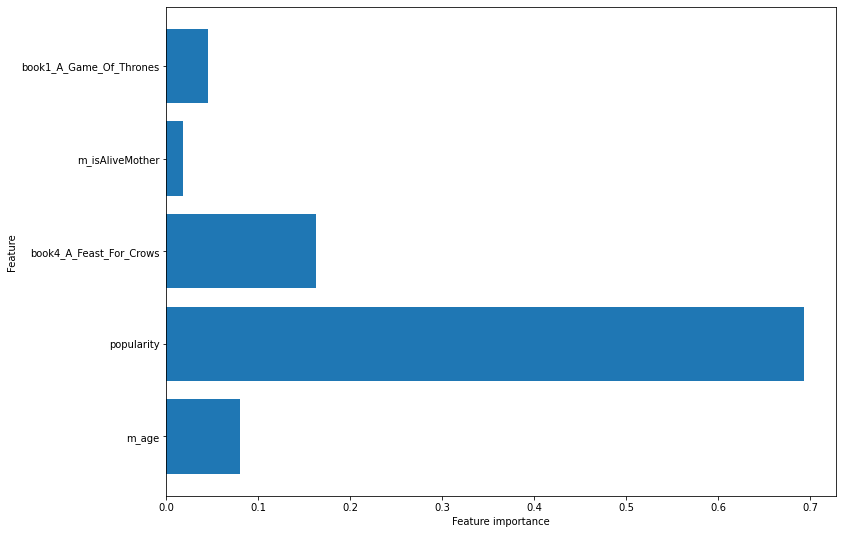

In [166]:
# plotting feature importances
plot_feature_importances(rf_default_fit,
                         train = x_train,
                         export = False)

In [167]:
# unpacking the confusion matrix
rf_tn, \
rf_fp, \
rf_fn, \
rf_tp = confusion_matrix(y_true = y_test, y_pred = rf_default_fit_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {rf_tn}
False Positives: {rf_fp}
False Negatives: {rf_fn}
True Positives : {rf_tp}
""")


True Negatives : 26
False Positives: 24
False Negatives: 9
True Positives : 136



In [168]:
# FITTING the training data
rf_default_fit = rf_default.fit(x_train, y_train)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(x_test)


# declaring a hyperparameter space
max_depth        = np.arange(1, 8, 1)
leaf_range       = np.arange(1, 31, 10)
criterion_range  = ['gini', 'entropy']
bootstrap_range  = [True, False]
warm_start_range = [True, False]


# creating a hyperparameter grid
param_grid = {'max_depth'        : max_depth,
              'min_samples_leaf' : leaf_range,
              'criterion'        : criterion_range,
              'bootstrap'        : bootstrap_range,
              'warm_start'       : warm_start_range}


# INSTANTIATING the model object without hyperparameters
forest_grid = RandomForestClassifier(random_state = 219)


# GridSearchCV object
forest_cv = RandomizedSearchCV(estimator           = forest_grid,
                               param_distributions = param_grid,
                               cv         = 3,
                               n_iter     = 1000,
                               scoring    = make_scorer(roc_auc_score,
                                            needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
forest_cv.fit(gameofthrones_data, gameofthrones_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", forest_cv.best_params_)
print("Tuned Training AUC:", forest_cv.best_score_.round(4))

C:\Users\Cholpon\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 168 is smaller than n_iter=1000. Running 168 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Tuned Parameters  : {'warm_start': True, 'min_samples_leaf': 1, 'max_depth': 5, 'criterion': 'entropy', 'bootstrap': True}
Tuned Training AUC: 0.6568


In [169]:
# best estimators based on RandomizedSearchCV
forest_cv.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=5, random_state=219,
                       warm_start=True)

In [170]:
# building a model based on hyperparameter tuning results

# INSTANTIATING with best_estimator
forest_tuned = RandomForestClassifier(criterion        = 'entropy',
                                      n_estimators     = 100,
                                      min_samples_leaf = 1,
                                      max_depth        = 7,
                                      warm_start       = True,
                                      bootstrap        = True,
                                      random_state     = 219)


# FITTING to the FULL DATASET (due to cross-validation)
forest_tuned_fit = forest_tuned.fit(gameofthrones_data, gameofthrones_target)


# PREDICTING based on the testing set
forest_tuned_pred = forest_tuned_fit.predict(x_test)


# SCORING the results
print('Forest Tuned Training ACCURACY:', forest_tuned.score(x_train, y_train).round(4))
print('Forest Tuned Testing  ACCURACY:', forest_tuned.score(x_test, y_test).round(4))
print('Forest Tuned AUC Score        :', roc_auc_score(y_true  = y_test,
                                                       y_score = forest_tuned_pred).round(4))


# saving scoring data for future use
forest_tuned_train_score = forest_tuned.score(x_train, y_train).round(4) # accuracy
forest_tuned_test_score  = forest_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
forest_tuned_auc = roc_auc_score(y_true  = y_test,
                                 y_score = forest_tuned_pred).round(4) # auc

Forest Tuned Training ACCURACY: 0.8195
Forest Tuned Testing  ACCURACY: 0.8872
Forest Tuned AUC Score        : 0.7931


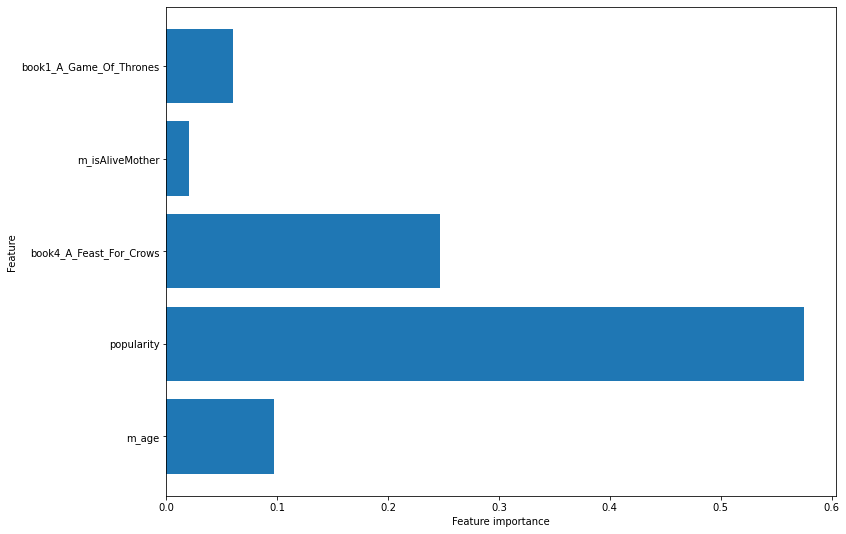

In [171]:
# plotting feature importances
plot_feature_importances(forest_tuned_fit,
                         train = x_train,
                         export = False)

In [172]:
# unpacking the confusion matrix
tuned_rf_tn, \
tuned_rf_fp, \
tuned_rf_fn, \
tuned_rf_tp = confusion_matrix(y_true = y_test, y_pred = forest_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_rf_tn}
False Positives: {tuned_rf_fp}
False Negatives: {tuned_rf_fn}
True Positives : {tuned_rf_tp}
""")


True Negatives : 30
False Positives: 20
False Negatives: 2
True Positives : 143



In [173]:
# INSTANTIATING the model object without hyperparameters
full_gbm_default = GradientBoostingClassifier(loss          = 'deviance',
                                              learning_rate = 0.1,
                                              n_estimators  = 100,
                                              criterion     = 'friedman_mse',
                                              max_depth     = 3,
                                              warm_start    = False,
                                              random_state  = 219)


# FIT step is needed as we are not using .best_estimator
full_gbm_default_fit = full_gbm_default.fit(x_train, y_train)


# PREDICTING based on the testing set
full_gbm_default_pred = full_gbm_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', full_gbm_default_fit.score(x_train, y_train).round(4))
print('Testing ACCURACY :', full_gbm_default_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = full_gbm_default_pred).round(4))

Training ACCURACY: 0.8195
Testing ACCURACY : 0.8667
AUC Score        : 0.7466


In [174]:
# unpacking the confusion matrix
gbm_default_tn, \
gbm_default_fp, \
gbm_default_fn, \
gbm_default_tp = confusion_matrix(y_true = y_test, y_pred = full_gbm_default_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_default_tn}
False Positives: {gbm_default_fp}
False Negatives: {gbm_default_fn}
True Positives : {gbm_default_tp}
""")


True Negatives : 25
False Positives: 25
False Negatives: 1
True Positives : 144



In [175]:
# declaring model performance objects
gbm_train_acc = full_gbm_default_fit.score(x_train, y_train).round(4)
gbm_test_acc  = full_gbm_default_fit.score(x_test, y_test).round(4)
gbm_auc       = roc_auc_score(y_true  = y_test,
                              y_score = full_gbm_default_pred).round(4)

In [176]:
# declaring a hyperparameter space
depth_range        = np.arange(1, 8, 1)
warm_start_range   = [True, False]

# creating a hyperparameter grid
param_grid = {'max_depth'     : depth_range,
              'warm_start'    : warm_start_range}


# INSTANTIATING the model object without hyperparameters
full_gbm_grid = GradientBoostingClassifier(random_state = 219)


# GridSearchCV object
full_gbm_cv = RandomizedSearchCV(estimator     = full_gbm_grid,
                           param_distributions = param_grid,
                           cv                  = 3,
                           n_iter              = 500,
                           random_state        = 219,
                           scoring             = make_scorer(roc_auc_score,
                                                 needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
full_gbm_cv.fit(gameofthrones_data, gameofthrones_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", full_gbm_cv.best_params_)
print("Tuned Training AUC:", full_gbm_cv.best_score_.round(4))

C:\Users\Cholpon\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 14 is smaller than n_iter=500. Running 14 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Tuned Parameters  : {'warm_start': True, 'max_depth': 7}
Tuned Training AUC: 0.6683


In [177]:
# checking the best estimator for the model
full_gbm_cv.best_estimator_

GradientBoostingClassifier(max_depth=7, random_state=219, warm_start=True)

In [178]:
# INSTANTIATING with best_estimator
gbm_tuned = GradientBoostingClassifier(max_depth     = 2,
                                       n_estimators = 100,
                                       warm_start    = True,
                                       random_state  = 219)


# FITTING to the FULL DATASET (due to cross-validation)
gbm_tuned_fit = gbm_tuned.fit(gameofthrones_data, gameofthrones_target)


# PREDICTING based on the testing set
gbm_tuned_pred = gbm_tuned_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', gbm_tuned_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', gbm_tuned_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = gbm_tuned_pred).round(4))

Training ACCURACY: 0.8053
Testing  ACCURACY: 0.8821
AUC Score        : 0.7831


In [179]:
# unpacking the confusion matrix
gbm_tuned_tn, \
gbm_tuned_fp, \
gbm_tuned_fn, \
gbm_tuned_tp = confusion_matrix(y_true = y_test, y_pred = gbm_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_tuned_tn}
False Positives: {gbm_tuned_fp}
False Negatives: {gbm_tuned_fn}
True Positives : {gbm_tuned_tp}
""")


True Negatives : 29
False Positives: 21
False Negatives: 2
True Positives : 143



In [180]:
# declaring model performance objects
gbm_tuned_train_acc = gbm_tuned_fit.score(x_train, y_train).round(4)
gbm_tuned_test_acc  = gbm_tuned_fit.score(x_test, y_test).round(4)
gbm_tuned_auc       = roc_auc_score(y_true  = y_test,
                              y_score = gbm_tuned_pred).round(4)

In [181]:
# creating a dictionary for model results
model_performance = {
    
    'Model Name'    : ['Logistic', 'Full Tree', 'Tuned LR', 'Tuned tree', 'Random Forest',
                      'Tuned Random Forest', 'GBM', 'Tuned GBM'],
           
    'AUC Score' : [logreg_auc_score, full_tree_auc_score, lr_tuned_auc, tree_tuned_auc, rf_auc,
                  forest_tuned_auc, gbm_auc, gbm_tuned_auc],
    
    'Training Accuracy' : [logreg_train_score, full_tree_train_score,
                           lr_tuned_train_score, tree_tuned_train_score, rf_train_acc,
                          forest_tuned_train_score, gbm_train_acc, gbm_tuned_train_acc],
           
    'Testing Accuracy'  : [logreg_test_score, full_tree_test_score,
                           lr_tuned_test_score, tree_tuned_test_score, rf_test_acc,
                          forest_tuned_test_score, gbm_test_acc, gbm_tuned_test_acc],

    'Confusion Matrix'  : [(logreg_tn, logreg_fp, logreg_fn, logreg_tp),
                           (full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp),
                           (lr_tuned_tn, lr_tuned_fp, lr_tuned_fn, lr_tuned_tp),
                           (tuned_tree_tn, tuned_tree_fp, tuned_tree_fn, tuned_tree_tp),
                           (rf_tn, rf_fp, rf_fn, rf_tp),
                           (tuned_rf_tn, tuned_rf_fp, tuned_rf_fn, tuned_rf_tp),
                           (gbm_default_tn, gbm_default_fp, gbm_default_fn, gbm_default_tp),
                           (gbm_tuned_tn, gbm_tuned_fp, gbm_tuned_fn, gbm_tuned_tp)]}

# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)

In [182]:
# comparing results

print(f"""


Model                AUC Score       Train Score      Test Score      Confusion Matrix
-----                ----------      -----------      ----------      ----------------
Logistic             {logreg_auc_score}          {logreg_train_score}           {logreg_test_score}          {(logreg_tn, logreg_fp, logreg_fn, logreg_tp)}
Full Tree            {full_tree_auc_score}          {full_tree_train_score}           {full_tree_test_score}          {(full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp)}
Tuned LR             {lr_tuned_auc}          {lr_tuned_train_score}           {lr_tuned_test_score}          {(lr_tuned_tn, lr_tuned_fp, lr_tuned_fn, lr_tuned_tp)} 
Tuned tree           {tree_tuned_auc}          {tree_tuned_train_score}           {tree_tuned_test_score}          {(tuned_tree_tn, tuned_tree_fp, tuned_tree_fn, tuned_tree_tp)}
Random Forest        {rf_auc}          {rf_train_acc}           {rf_test_acc}          {(rf_tn, rf_fp, rf_fn, rf_tp)}
*Tuned Random Forest  {forest_tuned_auc}          {forest_tuned_train_score}           {forest_tuned_test_score}          {(tuned_rf_tn, tuned_rf_fp, tuned_rf_fn, tuned_rf_tp)} 
GBM                  {gbm_auc}          {gbm_train_acc}           {gbm_test_acc}          {(gbm_default_tn, gbm_default_fp, gbm_default_fn, gbm_default_tp)}
Tuned GBM            {gbm_tuned_auc}          {gbm_tuned_train_acc}           {gbm_tuned_test_acc}          {(gbm_tuned_tn, gbm_tuned_fp, gbm_tuned_fn, gbm_tuned_tp)}
""")




Model                AUC Score       Train Score      Test Score      Confusion Matrix
-----                ----------      -----------      ----------      ----------------
Logistic             0.6831          0.7801           0.8308          (19, 31, 2, 143)
Full Tree            0.7383          0.8567           0.8154          (29, 21, 15, 130)
Tuned LR             0.7397          0.787           0.8564          (25, 25, 3, 142) 
Tuned tree           0.7831          0.811           0.8821          (29, 21, 2, 143)
Random Forest        0.729          0.8567           0.8308          (26, 24, 9, 136)
*Tuned Random Forest  0.7931          0.8195           0.8872          (30, 20, 2, 143) 
GBM                  0.7466          0.8195           0.8667          (25, 25, 1, 144)
Tuned GBM            0.7831          0.8053           0.8821          (29, 21, 2, 143)

